# PREDICTIVE MODELING WITH LINEAR REGRESSION

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None

First few rows of the dataset:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0 

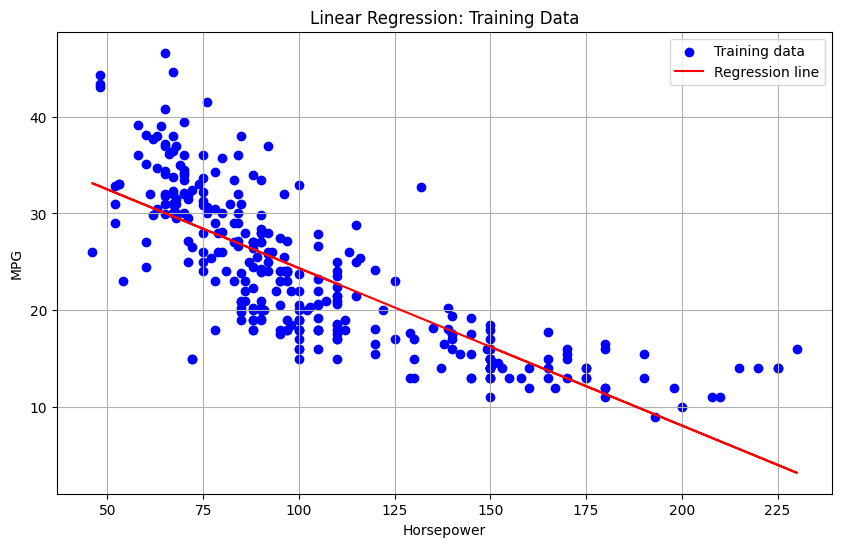

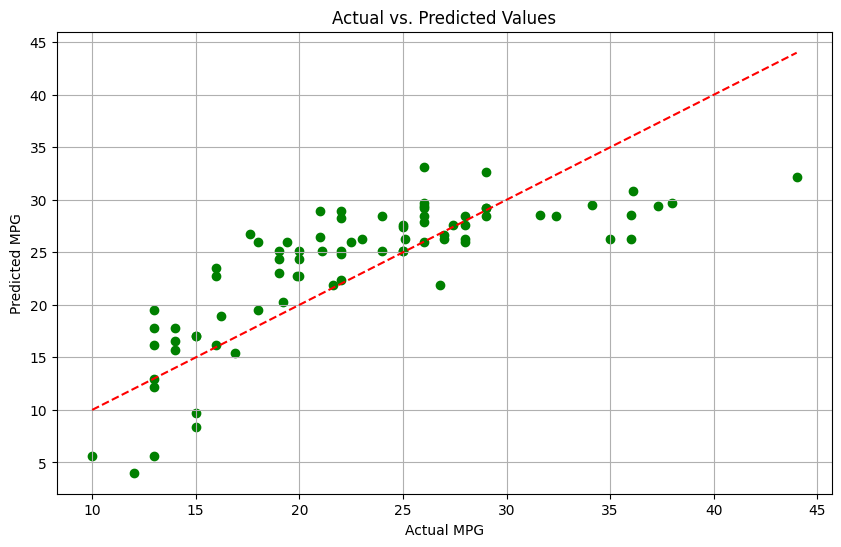

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "C:/Users/sweet/Downloads/auto-mpg.csv"  
data = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

# Specify the features (X) and target variable (y)
# Assuming 'mpg' is the target variable and we use one feature, e.g., 'horsepower'.
data = data.replace('?', np.nan)  # Replace missing values
data = data.dropna()  # Drop rows with missing values
data['horsepower'] = data['horsepower'].astype(float)  # Convert horsepower to numeric

X = data[['horsepower']]  # Feature
y = data['mpg']  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize the regression line (for training data)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
plt.title('Linear Regression: Training Data')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid()
plt.show()

# Visualize actual vs. predicted values (for testing data)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.grid()
plt.show()
